In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
originaldf = pd.read_csv('Car dataset.csv')

In [3]:
df = originaldf

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.head(7)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner


In [6]:
df.drop('name', axis = 1, inplace = True) #name column is of no use

In [7]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [8]:
df = df[df['fuel'] != 'Electric']

In [9]:
df['fuel'] = df['fuel'].map({'Diesel':1,'Petrol':2,'CNG':3,'LPG':4}) #converting string object to integer object

/tmp/ipykernel_11254/970298646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel'] = df['fuel'].map({'Diesel':1,'Petrol':2,'CNG':3,'LPG':4}) #converting string object to integer object


In [10]:
df['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               993
Trustmark Dealer     102
Name: count, dtype: int64

In [11]:
df['seller_type'] = df['seller_type'].map({'Individual':1,'Dealer':2,'Trustmark Dealer':3})

/tmp/ipykernel_11254/2395661264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_type'] = df['seller_type'].map({'Individual':1,'Dealer':2,'Trustmark Dealer':3})


In [12]:
df['transmission'].value_counts()

transmission
Manual       3892
Automatic     447
Name: count, dtype: int64

In [13]:
df['transmission'] = df['transmission'].map({'Manual':1,'Automatic':2})

/tmp/ipykernel_11254/4280202221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission'] = df['transmission'].map({'Manual':1,'Automatic':2})


In [14]:
df['owner'].value_counts()

owner
First Owner             2832
Second Owner            1105
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [15]:
df['owner'] = df['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})

/tmp/ipykernel_11254/2763578461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owner'] = df['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})


In [16]:
df.head() #quick check

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,2,1,1,1
1,2007,135000,50000,2,1,1,1
2,2012,600000,100000,1,1,1,1
3,2017,250000,46000,2,1,1,1
4,2014,450000,141000,1,1,1,2


In [17]:
df.corr() #to check what columns (independent variables) affect the price (dependent variable) and by how much

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
year,1.000000,0.413932,-0.419861,-0.122681,0.183127,0.145136,-0.410327
selling_price,0.413932,1.000000,-0.192298,-0.276251,0.240841,0.530972,-0.198791
km_driven,-0.419861,-0.192298,1.000000,-0.250580,-0.187147,-0.120285,0.274440
fuel,-0.122681,-0.276251,-0.250580,1.000000,-0.037099,-0.056865,0.017736
seller_type,0.183127,0.240841,-0.187147,-0.037099,1.000000,0.199450,-0.211422
transmission,0.145136,0.530972,-0.120285,-0.056865,0.199450,1.000000,-0.084503
owner,-0.410327,-0.198791,0.274440,0.017736,-0.211422,-0.084503,1.000000


In [18]:
df = df[df['owner']!=5] #steps to increase the correlation

In [19]:
df = df[df['fuel']!=4]

In [20]:
df = df[df['fuel']!=3]

In [21]:
df = df[df['owner']!=4]

In [22]:
df.drop('km_driven', axis =1, inplace = True) #dropping columns with less affect

In [23]:
df.columns #for determining the independent variables

Index(['year', 'selling_price', 'fuel', 'seller_type', 'transmission',
       'owner'],
      dtype='object')

In [24]:
x = df[['year', 'fuel', 'seller_type',
       'transmission', 'owner']]
y = df['selling_price']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state =90) 

In [27]:
#Applying K-nearest neighbours
from sklearn.neighbors import KNeighborsRegressor #importing the algorithm
from sklearn.metrics import mean_squared_error #importing library for evaluating the model  

In [28]:
model1 = KNeighborsRegressor(n_neighbors = 4) #making the model

In [29]:
model1.fit(xtrain,ytrain) #Trained the model

KNeighborsRegressor(n_neighbors=4)

In [30]:
predictions1 = model1.predict(xtest)

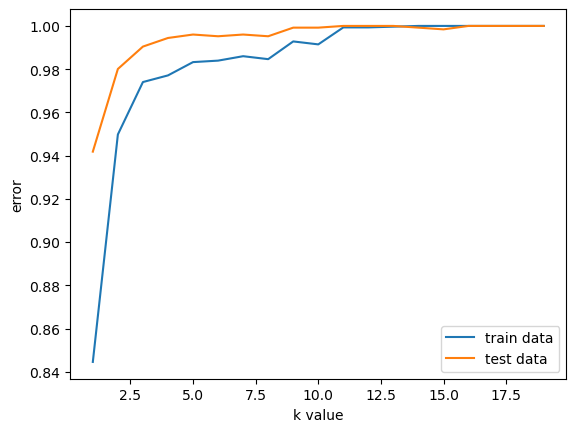

In [31]:
#To determine for which N, the KNN algorithm has minimal error and realistic situation
error1 = []
error2 = []
for k in range(1,20):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(xtrain,ytrain)
    prediction1 = model.predict(xtrain)
    error1.append(np.mean(ytrain!=prediction1))
    prediction2 = model.predict(xtest)
    error2.append(np.mean(ytest!=prediction2))
plt.plot(range(1,20),error1,label='train data')
plt.plot(range(1,20),error2, label= 'test data')
plt.xlabel('k value')
plt.ylabel('error')
plt.legend()

In [32]:
np.sqrt(mean_squared_error(ytest,predictions1))

472187.7246351397

In [33]:
model1.score(xtrain,ytrain)

0.7187984612874612

In [46]:
#Applying Linear Regreession
from sklearn.linear_model import LinearRegression

In [37]:
model2=LinearRegression()

In [38]:
model2.fit(xtrain,ytrain)

LinearRegression()

In [39]:
predictions2=model2.predict(xtest)

In [40]:
np.sqrt(mean_squared_error(ytest,predictions2))

479385.2830944504

In [41]:
model2.score(xtrain,ytrain)

0.47698254734796663

In [50]:
#Visualising why Linear Regression is not suitable for this dataset
residuals=ytest-predictions2

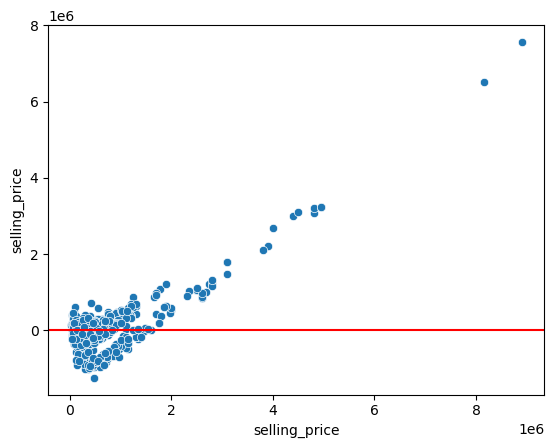

In [49]:
#residuals vs y scatterplot
sns.scatterplot(x=ytest,y=residuals)
plt.axhline(y=0,color='r')
#You can see the distribution is not very random and forms kind of a curve

/home/mohit/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


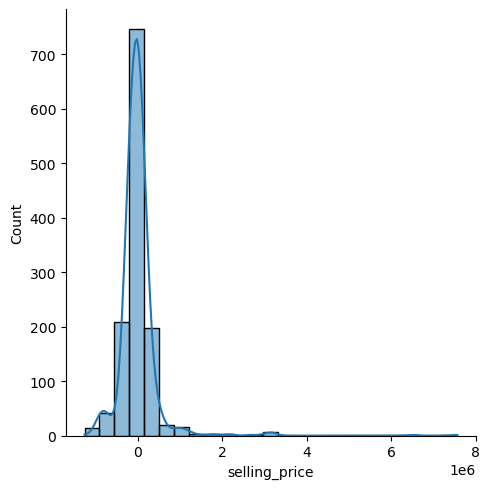

In [52]:
sns.displot(residuals,bins=25,kde=True)

In [36]:
#Adjusting Linear Regression, Applying Polynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly_converter=PolynomialFeatures(degree=2,include_bias=False)

In [41]:
poly_converter.fit(x)

PolynomialFeatures(include_bias=False)

In [43]:
new_data=poly_converter.transform(x)

In [44]:
nxtrain,nxtest,nytrain,nytest = train_test_split(new_data,y,test_size = 0.3,random_state = 90) 

In [48]:
from sklearn.linear_model import LinearRegression
model3=LinearRegression()

In [49]:
model3.fit(nxtrain,nytrain)

LinearRegression()

In [50]:
predictions3 = model3.predict(nxtest)

In [51]:
np.sqrt(mean_squared_error(nytest,predictions3))

452014.89561771066

In [52]:
model3.score(nxtrain,nytrain)

0.6319918232415533

In [54]:
residuals2 = nytest-predictions3

/home/mohit/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


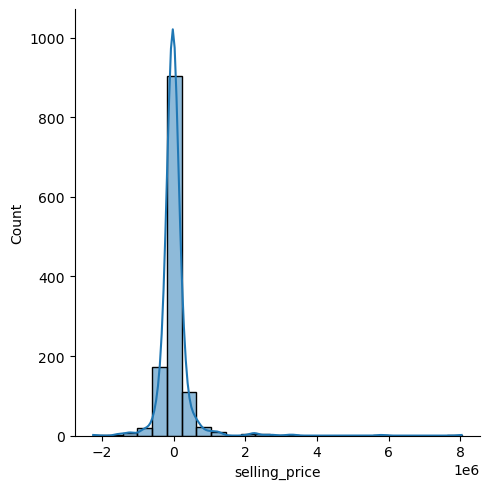

In [55]:
#Distribution of new residuals to check normality
sns.displot(residuals2, bins=25, kde=True)

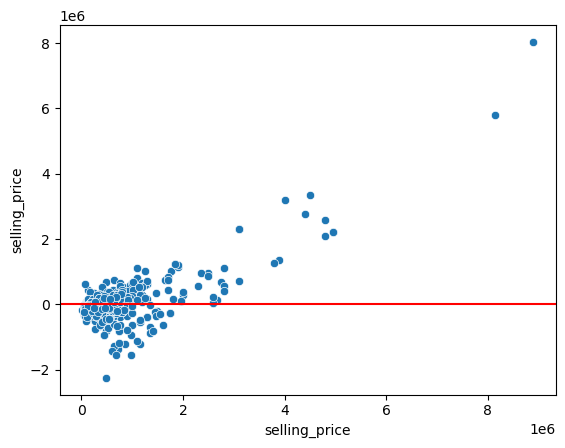

In [58]:
#normality is much better
#now checking residuals vs y
sns.scatterplot(x=nytest,y=residuals2)
plt.axhline(y=0,color='r')

In [59]:
#This is also much better
#Going further with an increase in model complexity

In [34]:
#Final model => kNN(k=4)
final_model=KNeighborsRegressor(n_neighbors=4)

In [35]:
final_model.fit(x,y)

KNeighborsRegressor(n_neighbors=4)

In [63]:
from joblib import dump

In [64]:
dump(final_model,"Car_price_predictor.joblib")

['Car_price_predictor.joblib']